# Riss 인기 학술자료 텍스트 마이닝

## 1. 사용할 패키지 설치

https://www.oracle.com/java/technologies/downloads/#jdk19-mac   
Java JDK 다운로드.   
konlpy를 사용하기 위해 필요.

에러 발생시 (M1)  
https://www.azul.com  
https://velog.io/@wijoonwu/맥북Mac-OS-M1-JDK-설치하기

In [1]:
!pip3 install selenium


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [2]:
!pip3 install jpype1


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [3]:
!pip3 install konlpy


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


## 2. 사용할 패키지 호출

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By

## 3. 프로그래밍

In [2]:
# webdriver 실행 후 riss 이동
browser = webdriver.Chrome()
browser.get("http://www.riss.kr/PopularList.do") 

In [3]:
# 현제 제공되고 있는 인기 학술자료 목록이 사용된 기간을 저장한다.
span1 = browser.find_element(By.CLASS_NAME, 'periodSpan1').text
span2 = browser.find_element(By.CLASS_NAME, 'periodSpan2').text
data_date = (span1 + "~" +span2)
data_date

'2023.3.5~2023.4.1'

In [4]:
# 페이지의 자료 확장
browser.find_element(By.ID, 'nextList').click()

In [5]:
thesis_data = browser.find_elements(By.TAG_NAME, 'tr')

csv = open(f"csv/{data_date}.csv", "a")
csv.write("논문 제목, 링크\n")
csv.close()

for thesis_data_sort in thesis_data:
    thesis_titles = thesis_data_sort.find_elements(By.CLASS_NAME, 'title')
    
    for thesis_title_data in thesis_titles:
        title = thesis_title_data.text
        link = thesis_title_data.get_attribute("href")
        
        csv = open(f"csv/{data_date}.csv", "a")
        csv.write(f"{title}, {link}\n")
        csv.close()
        
        file = open(f"txt/{data_date}.txt", "a")
        file.write(f"{title}\n")
        file.close()

In [6]:
# 저장한 텍스트 파일 읽어오기
file_data = open(f"txt/{data_date}.txt", encoding= "UTF-8").read()
file_data

"미래 사회에서 메타버스 교육의 방향\n사형제도는 폐지되어야 하는가?\n스트레스 수준이 대학생들의 학업 성취도에 미치는 영향\n헤어질 결심\n촉법소년 상한(형사미성년자) 연령 하향에 대한 비판적 고찰\n노키즈존 확산, 어떻게 볼 것인가?\n대리모 산업의 윤리적 문제와 해결방안\n챗GPT 충격파… 성큼 다가온 인공지능\n[토론문 1] 저출산·고령화와 인구정책\n챗봇 기반 인공지능 교육 프로그램 개발과 적용\n국내외 가짜뉴스(Fake News)에 대한 뉴스 공정성 연구논의 탐색\n고교학점제의 쟁점과 과제 분석\n사상체질과 MBTI성격유형검사를 통한 대학생 건강염려증의 상관관계연구\n최저임금제도 개선방안에 관한 연구\nMZ 세대의 개인주의 문화, 어떻게 볼 것인가?\n인지발달에 대한 삐아제 이론과 비고츠키 이론의 비교\n그리스-로마 신화의 교훈\n부산시 반송동 정책이주지 주택 변화 연구\n영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구 - 신체가 있는 인공지능과 하이퍼 인공지능을 중심으로\n한국 인공지능 교육의 방향\n음악치료 소개와 음악이란 매개체가 갖는 특별한 우수성\n미혼 성인남녀의 저출산 정책 인식에 관한 연구\n신노년세대를 위한 노인복지주택에 관한 연구\n고교학점제 도입 추진 정책에 대한 비판적 검토\n구글 시대 저무나? 인공지능 ‘챗GPT’ 돌풍\n자연 상태에서 일어나는 음펨바 효과에 대한 연구\n다이어트, 당신은 건강합니까?\n행동주의 상담과 인본주의 상담의 특성 비교\n디지털 정보활용능력이 노인의 삶의 만족도에 미치는 영향에 관한 연구\n인공지능 리터러시 기반의 설명가능한 인공지능 교육 프로그램의 효과\nThe Impact of Employees' Growth Mindset on Organizational Citizenship Behavior in Small and Medium-sized Enterprises (SMEs): Focusing on the Mediating Effect of Authentic Leadership\n보웬(M. Bo

In [7]:
# 불필요한 문자 제거
# '[^가-힣]' : 한글이 아닌 모든 문자
import re
file_data = re.sub('[^가-힣]', ' ', file_data)
file_data

'미래 사회에서 메타버스 교육의 방향 사형제도는 폐지되어야 하는가  스트레스 수준이 대학생들의 학업 성취도에 미치는 영향 헤어질 결심 촉법소년 상한 형사미성년자  연령 하향에 대한 비판적 고찰 노키즈존 확산  어떻게 볼 것인가  대리모 산업의 윤리적 문제와 해결방안 챗    충격파  성큼 다가온 인공지능  토론문    저출산 고령화와 인구정책 챗봇 기반 인공지능 교육 프로그램 개발과 적용 국내외 가짜뉴스           에 대한 뉴스 공정성 연구논의 탐색 고교학점제의 쟁점과 과제 분석 사상체질과     성격유형검사를 통한 대학생 건강염려증의 상관관계연구 최저임금제도 개선방안에 관한 연구    세대의 개인주의 문화  어떻게 볼 것인가  인지발달에 대한 삐아제 이론과 비고츠키 이론의 비교 그리스 로마 신화의 교훈 부산시 반송동 정책이주지 주택 변화 연구 영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구   신체가 있는 인공지능과 하이퍼 인공지능을 중심으로 한국 인공지능 교육의 방향 음악치료 소개와 음악이란 매개체가 갖는 특별한 우수성 미혼 성인남녀의 저출산 정책 인식에 관한 연구 신노년세대를 위한 노인복지주택에 관한 연구 고교학점제 도입 추진 정책에 대한 비판적 검토 구글 시대 저무나  인공지능  챗     돌풍 자연 상태에서 일어나는 음펨바 효과에 대한 연구 다이어트  당신은 건강합니까  행동주의 상담과 인본주의 상담의 특성 비교 디지털 정보활용능력이 노인의 삶의 만족도에 미치는 영향에 관한 연구 인공지능 리터러시 기반의 설명가능한 인공지능 교육 프로그램의 효과                                                                                                                                                                                       보웬          의 다세대 가족치료 인공지능교육에 대한 초등교사의

#### m1 맥에서 jvm을 제대로 찾지 못하는 이슈가 있었음.
#### 맨 위의 링크를 통해 설치하고 경로를 직접 설정
#### https://github.com/konlpy/konlpy/issues/353 해당 페이지 참조

In [8]:
# 명사 추출
import konlpy
JVM_PATH = '/Library/Java/JavaVirtualMachines/zulu-11.jdk/Contents/Home/bin/java'


hannanum = konlpy.tag.Hannanum(jvmpath=JVM_PATH)
nouns_data = hannanum.nouns(file_data)
print(nouns_data)


['미래', '사회', '메타버스', '교육', '방향', '사형제도', '폐', '스트레스', '수준', '대학생들', '학업', '성취도', '영향', '결심', '촉법소년', '형사미성년자', '연령', '하향', '비판적', '고찰', '노키즈존', '확산', '것', '대리모', '산업', '윤리적', '문제', '해결방안', '챗', '충격파', '인공지능', '토론문', '저출산', '고령화', '인구정책', '챗봇', '기반', '인공지능', '교육', '프로그램', '개발', '적용', '국내외', '가짜뉴스', '뉴스', '공정성', '연구논', '탐색', '고교학점제', '쟁점', '과제', '분석', '사상체질', '성격유형검사', '대학생', '건강염려증', '상관관계연구', '최저임금제', '개선방안', '연구', '세대', '개인주의', '문화', '것', '인지발달', '삐아제', '이론', '비고츠키', '이론', '비교', '그리스', '로마', '신화', '교훈', '부산시', '반송동', '정책이주', '주택', '변화', '연구', '영화', '속', '인공지능', '인간화', '인간지배', '현상', '연구', '신체', '인공지능', '하이퍼', '인공지능', '중심', '한국', '인공지능', '교육', '방향', '음악치료', '소개', '음악', '매개체', '특별', '우수성', '미혼', '성인남녀', '저출산', '정책', '식', '연구', '노년세대', '노인복지주택', '연구', '고교학점제', '도입', '추진', '정책', '비판적', '검토', '구글', '시대', '인공지능', '챗', '돌풍', '자연', '상태', '음펨바', '효과', '연구', '다이어트', '당신', '건강', '행동주의', '상담', '인본주의', '상담', '특성', '비교', '디지털', '정보활용능력', '노인', '삶', '만족도', '영향', '연구', '인공지능', '리터러시', '기반', '설명가능', '인

In [9]:
import pandas as pd
df_word = pd.DataFrame({'word' : nouns_data})
df_word

,word
0,미래
1,사회
2,메타버스
3,교육
4,방향
...,...
563,국회기후변화포럼
564,미세먼지
565,관리
566,종합대책


In [10]:
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,미래,2
1,사회,2
2,메타버스,4
3,교육,2
4,방향,2
...,...,...
563,국회기후변화포럼,8
564,미세먼지,4
565,관리,2
566,종합대책,4


In [11]:
df_word = df_word.groupby('word', as_index=False)\
    .agg(n = ('word', 'count'))\
        .sort_values('n', ascending=False)
df_word

,word,n
212,연구,21
256,인공지능,18
216,영향,11
41,교육,9
136,분석,7
...,...,...
150,사형제도,1
149,사용실태,1
148,사상체질,1
144,삐아제,1


In [12]:
# 단어 빈도 막대 그래프
top20 = df_word.head(20)

In [13]:
!pip3 install seaborn


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


<AxesSubplot: xlabel='n', ylabel='word'>

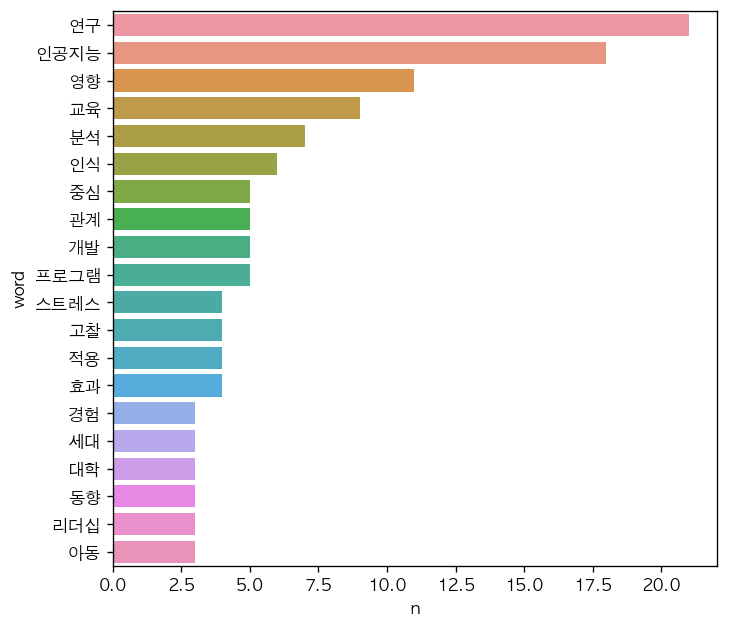

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트의 경우 
# https://github.com/GUuu9/Nas_Docker_jupyter_Ko_fonts
# 해당 페이지을 참고하여 폰트 설정

plt.rcParams.update({'font.family' : 'AppleGothic',
                    'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

bar_data = sns.barplot(data = top20, y = 'word', x= 'n')
plt.savefig(f'barplot/{data_date}.png', dpi=300)
bar_data

In [15]:
# 워드 클라우드 생성
!pip3 install wordcloud


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [16]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'연구': 21,
 '인공지능': 18,
 '영향': 11,
 '교육': 9,
 '분석': 7,
 '인식': 6,
 '중심': 5,
 '관계': 5,
 '개발': 5,
 '프로그램': 5,
 '스트레스': 4,
 '고찰': 4,
 '적용': 4,
 '효과': 4,
 '경험': 3,
 '세대': 3,
 '대학': 3,
 '동향': 3,
 '리더십': 3,
 '아동': 3,
 '이론': 3,
 '한국': 3,
 '변화': 3,
 '년': 3,
 '정책': 3,
 '간호사': 3,
 '사건': 2,
 '윤리': 2,
 '사례': 2,
 '기반': 2,
 '사례연구': 2,
 '식': 2,
 '시사점': 2,
 '자아존중감': 2,
 '스마트시티': 2,
 '노인': 2,
 '만족': 2,
 '사회': 2,
 '인공지능교육': 2,
 '저출산': 2,
 '탐색': 2,
 '지각': 2,
 '메타버스': 2,
 '수': 2,
 '산업': 2,
 '간호대학생': 2,
 '상담': 2,
 '것': 2,
 '매개효과': 2,
 '대인관계': 2,
 '프로젝트': 2,
 '건강': 2,
 '활용': 2,
 '고교학점제': 2,
 '의': 2,
 '자연': 2,
 '공간': 2,
 '챗': 2,
 '분야': 2,
 '과제': 2,
 '관련': 2,
 '촉법소년': 2,
 '예술': 2,
 '방향': 2,
 '교양교육': 2,
 '비교': 2,
 '창의성': 2,
 '비판적': 2,
 '개선방안': 2,
 '하향': 2,
 '심리적': 2,
 '초등학생': 2,
 '작품': 1,
 '작동': 1,
 '잡': 1,
 '작성': 1,
 '음악치료': 1,
 '원소': 1,
 '재직의도': 1,
 '쟁점': 1,
 '저감': 1,
 '저항성': 1,
 '적': 1,
 '전': 1,
 '전공만족도': 1,
 '전문가': 1,
 '전문간호사제도': 1,
 '정보활용능력': 1,
 '정서조절전략': 1,
 '우주': 1,
 '정신장애인': 1,
 '원소주기율표': 1,
 '인지발달': 1

In [17]:
from wordcloud import WordCloud
we = WordCloud(random_state = 1234,
              font_path = 'AppleGothic',
              width = 400,
              height = 400,
              background_color = 'white')

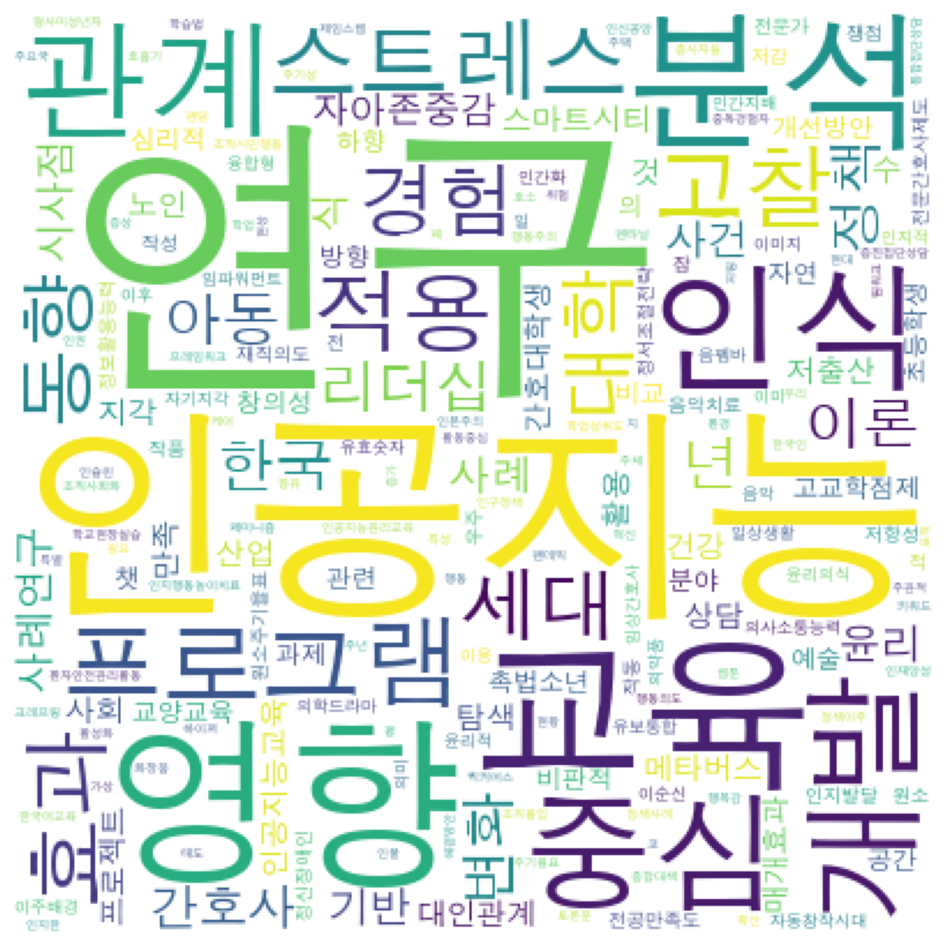

In [18]:
img_wordcloud = we.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
img_wordcloud = plt.imshow(img_wordcloud)
plt.savefig(f'wordcloud/{data_date}.png', dpi=300)
img_wordcloud

➜Riss_Popular_thesis_wordCloud git:(main) ✗ git init
Reinitialized existing Git repository in /Users/uuu9/GIT/Riss_Popular_thesis_wordCloud/.git/

➜  Riss_Popular_thesis_wordCloud git:(main) ✗ git add .

➜  Riss_Popular_thesis_wordCloud git:(main) ✗ git commit -m "init commit"
[main d8ae137] init commit
 6 files changed, 537 insertions(+), 334 deletions(-)
 create mode 100644 barplot/2023.3.5~2023.4.1.png
 create mode 100644 csv/2023.3.5~2023.4.1.csv
 create mode 100644 txt/2023.3.5~2023.4.1.txt
 create mode 100644 wordcloud/2023.3.5~2023.4.1.png
➜  Riss_Popular_thesis_wordCloud git:(main) git branch -M main

➜  Riss_Popular_thesis_wordCloud git:(main) git push origin main
Enumerating objects: 19, done.
Counting objects: 100% (19/19), done.
Delta compression using up to 10 threads
Compressing objects: 100% (12/12), done.
Writing objects: 100% (12/12), 900.67 KiB | 19.58 MiB/s, done.
Total 12 (delta 6), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (6/6), completed with 5 local objects.
To https://github.com/GUuu9/Riss_Popular_thesis_wordCloud.git
   5137005..d8ae137  main -> main